In [66]:
from itertools import islice, cycle
from tau_profile_parser import TauProfileParser
import pandas as pd
import plotly.graph_objs as go
import plotly as py
import plotly.express as px

Turn on offline mode

In [67]:
py.offline.init_notebook_mode(connected=True)

Plotly Bar Plot Examples
========================

This notebook demonstrates using the TauProfileParser to parse TAU profile.x.y.z files and using Plotly to generate ParaProf-style bar plots from them.

The TAU Profile Parser
----------------------

First, we call `TauProfileParser.parse` on the path to a directory containing TAU profile files. 

Note that the parser does not currently have any native support for MULTI_ directories, so if you have those
you'll have to call parse multiple times and then, if you wish, merge the resulting dataframes. This functionality should be added to the parser.

In [68]:
lulesh_data = TauProfileParser.parse('lulesh_profile')

This returns an object that provides access to the metric name, metadata, and the interval and atomic/userevent data.

The `metric` attribute contains the metric that values in this profile represent. (This representation will need to change when multi-metric data can be read in directly)


In [69]:
lulesh_data.metric

b'TIME'

The `metadata` attribute contains a Python dictionary of the metadata recorded in the profile.0.0.0 file

In [70]:
lulesh_data.metadata

{'Metric Name': 'TIME',
 'CPU Cores': '18',
 'CPU MHz': '1292.907',
 'CPU Type': 'Intel(R) Xeon(R) CPU E5-2697 v4 @ 2.30GHz',
 'CPU Vendor': 'GenuineIntel',
 'CWD': '/home/nchaimov/LULESH/build',
 'Cache Size': '46080 KB',
 'Command Line': './lulesh2.0 -p -i 1000',
 'Ending Timestamp': '1594670306715723',
 'Executable': '/home/nchaimov/LULESH/build/lulesh2.0',
 'Hostname': 'delphi',
 'Local Time': '2020-07-13T12:58:14-07:00',
 'Memory Size': '131624740 kB',
 'Node Name': 'delphi',
 'OMP_CHUNK_SIZE': '0',
 'OMP_DEFAULT_DEVICE': '0',
 'OMP_DYNAMIC': 'FALSE',
 'OMP_MAX_ACTIVE_LEVELS': '2147483647',
 'OMP_MAX_TASK_PRIORITY': '0',
 'OMP_MAX_THREADS': '16',
 'OMP_NUM_PLACES': '1',
 'OMP_NUM_PROCS': '72',
 'OMP_PLACE_NUM_PROCS': '{0:72}',
 'OMP_PLACE_PROC_IDS': '{0:[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71]}',
 'OMP_PROC_BIND': 'F

The `indices` attribute contains the (node, context, thread) tuples that are present in this profile.

In [71]:
lulesh_data.indices

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 0, 9),
 (0, 0, 10),
 (0, 0, 11),
 (0, 0, 12),
 (0, 0, 13),
 (0, 0, 14),
 (0, 0, 15)]

The `atomic_data()` function returns a Pandas dataframe containing the atomic events (user and context events). This is a multi-index dataframe with Node, Context, Thread, and Timer as the indices.

(This profile was collected with an instrumented version of Open MPI which collects memory allocations for different object sizes.)

In [72]:
lulesh_data.atomic_data()

Count  \
Node Context Thread Timer                                                      
0    0       0      alloc opal_thread_t                                    1   
                    alloc mca_base_component_list_item_t                  66   
                    alloc mca_base_var_group_t                           152   
                    alloc mca_base_var_t                                 691   
                    alloc mca_base_var_enum_t                             17   
                    alloc opal_dss_type_info_t                            46   
                    alloc opal_list_t                                     57   
                    alloc mca_base_component_repository_item_t           101   
                    alloc opal_if_t                                        7   
                    alloc orte_schizo_base_active_module_t                 1   
                    alloc opal_progress_tracker_t                          1   
                    alloc opal_pmix_evar_t                                17   
                    alloc opal_pmix2x_jobid_trkr_t                         1   
                    alloc opal_pmix2x_event_t                              3   
                    alloc opal_value_t                                     7   
                    alloc orte_state_t                                     2   
                    alloc orte_routed_base_active_t                        4   
                    alloc orte_rml_pathway_t                               1   
                    alloc orte_attribute_t                                 5   
                    alloc orte_rml_base_active_t                           1   
                    alloc mca_oob_uri_req_t                                1   
                    alloc orte_oob_base_peer_t                             1   
                    alloc mca_oob_tcp_peer_t                               1   
                    alloc mca_oob_tcp_addr_t                               5   
                    alloc pmix2x_opcaddy_t                                 7   
                    alloc orte_rml_posted_recv_t                           5   
                    alloc orte_rml_posted_recv_t <= orte_rml_recv_r...     5   
                    alloc orte_rml_recv_request_t                          5   
                    alloc orte_grpcomm_base_active_t                       1   
                    alloc ompi_datatype_t                                 11   
                    alloc opal_convertor_t                                 2   
                    alloc ompi_proc_t                                      1   
                    alloc opal_pointer_array_t                             1   
                    alloc ompi_op_base_module_t                           12   
                    alloc mca_base_pvar_t                                  5   
                    alloc mca_mpool_hugepage_hugepage_t                    1   
                    alloc mca_base_var_enum_flag_t                         3   
                    alloc mca_btl_base_selected_module_t                   7   
                    alloc opal_mutex_t                                     2   
                    alloc ompi_info_entry_t                                8   
                    alloc ompi_group_t                                     2   
                    alloc opal_hash_table_t                                2   
                    alloc opal_bitmap_t                                    1   
                    alloc ompi_attribute_keyval_t                         12   
                    alloc attribute_value_t                                7   
                    alloc mca_bml_base_endpoint_t                          1   
                    alloc mca_pml_ob1_comm_t                               2   
                    alloc mca_pml_ob1_comm_proc_t                          2   
                    alloc mca_pml_ob1_comm_proc_t <= mca_pml_ob1_co... 

The `interval_data()` function returns the timer data. As with atomic_data(), it is returned as a multi-index Pandas dataframe with Node, Context, Thread, and Timer as the indices.

In [73]:
lulesh_data.interval_data()

Calls  \
Node Context Thread Timer                                                        
0    0       0      .TAU application                                         1   
                    OpenMP_Parallel_Region CalcVolumeForceForElems ...     932   
                    OpenMP_Implicit_Task                                458544   
                    OpenMP_Sync_Region_Barrier CalcVolumeForceForEl...     932   
                    OpenMP_Parallel_Region CalcVolumeForceForElems ...     932   
...                                                                        ...   
             15     [SAMPLE] CalcFBHourglassForceForElems(Domain&, ...       1   
                    OpenMP_Implicit_Task  => [CONTEXT] OpenMP_Impli...       1   
                    [SAMPLE] UpdateVolumesForElems(Domain&, double,...       1   
                    OpenMP_Implicit_Task  => [CONTEXT] OpenMP_Impli...       1   
                    OpenMP_Thread_Type_ompt_thread_worker  => [CONT...       1   

                                                                        Subcalls  \
Node Context Thread Timer                                                          
0    0       0      .TAU application                                      458544   
                    OpenMP_Parallel_Region CalcVolumeForceForElems ...       932   
                    OpenMP_Implicit_Task                                  512600   
                    OpenMP_Sync_Region_Barrier CalcVolumeForceForEl...         0   
                    OpenMP_Parallel_Region CalcVolumeForceForElems ...       932   
...                                                                          ...   
             15     [SAMPLE] CalcFBHourglassForceForElems(Domain&, ...         0   
                    OpenMP_Implicit_Task  => [CONTEXT] OpenMP_Impli...         0   
                    [SAMPLE] UpdateVolumesForElems(Domain&, double,...         0   
                    OpenMP_Implicit_Task  => [CONTEXT] OpenMP_Impli...         0   
                    OpenMP_Thread_Type_ompt_thread_worker  => [CONT...         0   

                                                                        Exclusive  \
Node Context Thread Timer                                                           
0    0       0      .TAU application                                      1396259   
                    OpenMP_Parallel_Region CalcVolumeForceForElems ...       5711   
                    OpenMP_Implicit_Task                                  7493651   
                    OpenMP_Sync_Region_Barrier CalcVolumeForceForEl...       6781   
                    OpenMP_Parallel_Region CalcVolumeForceForElems ...       2208   
...                                                                           ...   
             15     [SAMPLE] CalcFBHourglassForceForElems(Domain&, ...       1001   
                    OpenMP_Implicit_Task  => [CONTEXT] OpenMP_Impli...       1001   
                    [SAMPLE] UpdateVolumesForElems(Domain&, double,...       1000   
                    OpenMP_Implicit_Task  => [CONTEXT] OpenMP_Impli...       1000   
                    OpenMP_Thread_Type_ompt_thread_worker  => [CONT...       1001   

                                                                        Inclusive  \
Node Context Thread Timer                                                           
0    0       0      .TAU application                                     12513680   
                    OpenMP_Parallel_Region CalcVolumeForceForElems ...      32948   
                    OpenMP_Implicit_Task                                 10124249   
                    OpenMP_Sync_Region_Barrier CalcVolumeForceForEl...       6781   
                    OpenMP_Parallel_Region CalcVolumeForceForElems ...      35503   
...                                                                           ...   
             15     [SAMPLE] CalcFBHourglassForceForElems(Domain&, ...       1001   
                    OpenMP_Implicit_Task  

We can manipulate this using normal Pandas functions. For example, here are the timers on (0,0,0) sorted by number of calls descending.

In [74]:
lulesh_data.interval_data().loc[0,0,0].sort_values('Calls', ascending=False)

,Calls,Subcalls,Exclusive,Inclusive,ProfileCalls,Group,Timer Name,Timer Location,Timer Type
Timer,,,,,,,,,
OpenMP_Implicit_Task,458544,512600,7493651,10124249,0,"GROUP=""TAU_OPENMP""",OpenMP_Implicit_Task,None,None
"OpenMP_Parallel_Region CalcPressureForElems [{/home/nchaimov/LULESH/lulesh.cc} {2022, 0}]",97860,97860,218060,1634266,0,"GROUP=""TAU_OPENMP""",OpenMP_Parallel_Region CalcPressureForElems,"{/home/nchaimov/LULESH/lulesh.cc} {2022, 0}",None
"OpenMP_Sync_Region_Barrier CalcPressureForElems [{/home/nchaimov/LULESH/lulesh.cc} {2022, 0}]",97860,0,291080,291080,0,"GROUP=""TAU_OPENMP""",OpenMP_Sync_Region_Barrier CalcPressureForElems,"{/home/nchaimov/LULESH/lulesh.cc} {2022, 0}",None
"OpenMP_Parallel_Region CalcPressureForElems [{/home/nchaimov/LULESH/lulesh.cc} {2029, 0}]",97860,97860,210603,1619691,0,"GROUP=""TAU_OPENMP""",OpenMP_Parallel_Region CalcPressureForElems,"{/home/nchaimov/LULESH/lulesh.cc} {2029, 0}",None
"OpenMP_Sync_Region_Barrier CalcPressureForElems [{/home/nchaimov/LULESH/lulesh.cc} {2029, 0}]",97860,0,300433,300433,0,"GROUP=""TAU_OPENMP""",OpenMP_Sync_Region_Barrier CalcPressureForElems,"{/home/nchaimov/LULESH/lulesh.cc} {2029, 0}",None
...,...,...,...,...,...,...,...,...,...
[SAMPLE] Domain::nodeElemCount(int) [{/home/nchaimov/LULESH/lulesh.h} {369}],1,0,2001,2001,0,"GROUP=""TAU_SAMPLE""",Domain::nodeElemCount(int),{/home/nchaimov/LULESH/lulesh.h} {369},SAMPLE
OpenMP_Implicit_Task => [CONTEXT] OpenMP_Implicit_Task => [SAMPLE] Domain::nodeElemCount(int) [{/home/nchaimov/LULESH/lulesh.h} {369}],1,0,2001,2001,0,"GROUP=""TAU_SAMPLE|TAU_CALLPATH""",OpenMP_Implicit_Task => [CONTEXT] OpenMP_Impl...,{/home/nchaimov/LULESH/lulesh.h} {369},None
"OpenMP_Parallel_Region CalcHourglassControlForElems [{/home/nchaimov/LULESH/lulesh.cc} {1043, 0}] => [CONTEXT] OpenMP_Parallel_Region CalcHourglassControlForElems [{/home/nchaimov/LULESH/lulesh.cc} {1043, 0}] => [SAMPLE] __kmp_join_call [{} {0}]",1,0,6000,6000,0,"GROUP=""TAU_SAMPLE|TAU_CALLPATH""",OpenMP_Parallel_Region CalcHourglassControlFor...,{} {0},None


## Sunburst chart

The data to create a sunburst chart is within the timers that are in TAU_CALLPATH group. These timers specify callpaths, where calls are seperated by ' => '. We create a new dataframe. We split them by ' => ' and add a new column for each call in the dataframe. Since the depth of the call path might be different for each timer, we expand dataframe as deep as the deepest callpath, and assing "" for empty calls.

In [75]:
node, context, thread = 0, 0, 0
col_name = 'Exclusive'
TOP_N = 10

In [76]:
data = lulesh_data.interval_data()

#keeping only the call-path names
data = data.loc[data["Group"].str.contains("TAU_CALLPATH")]         
data = data.loc[node, context, thread][[col_name]] 
sorted_data = data.sort_values(by=[col_name], ascending=False)

# everything below the 'TOP_N'
others = pd.DataFrame(sorted_data[TOP_N:].sum()).transpose()       
truncated = pd.concat([sorted_data[:TOP_N], pd.Series(name='Others')], copy=False)

# adding the index, which is the callpath, as a column
truncated['Timer'] = truncated.index            

# seperating the calls in the callpath, adding the seperated calls back to main df
tmp = truncated['Timer'].str.split("  => ",expand=True) 
truncated[list(tmp.columns)] = tmp 
truncated = truncated.drop(columns=["Timer"]) # we no longer need the callpath timer

truncated = truncated.append(pd.Series(name='Others'))
truncated = truncated.fillna("")
others_val = others[col_name].values[0]
truncated.loc['Others', col_name] = others_val

sunburst_data = truncated
sunburst_data

/Users/parsabagheri/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/Users/parsabagheri/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



,Exclusive,0,1,2
"OpenMP_Sync_Region_Barrier EvalEOSForElems(Domain&, double*, int, int*, int) [clone ._omp_fn.17] [{/home/nchaimov/LULESH/lulesh.cc} {2263, 0}] => [CONTEXT] OpenMP_Sync_Region_Barrier EvalEOSForElems(Domain&, double*, int, int*, int) [clone ._omp_fn.17] [{/home/nchaimov/LULESH/lulesh.cc} {2263, 0}] => [SAMPLE] __kmp_barrier [{} {0}]",390817,OpenMP_Sync_Region_Barrier EvalEOSForElems(Dom...,[CONTEXT] OpenMP_Sync_Region_Barrier EvalEOSFo...,[SAMPLE] __kmp_barrier [{} {0}]
"OpenMP_Implicit_Task => [CONTEXT] OpenMP_Implicit_Task => [SAMPLE] CalcPressureForElems(double*, double*, double*, double*, double*, double*, double, double, double, int, int*) [clone ._omp_fn.24] [{/home/nchaimov/LULESH/lulesh.cc} {2025}]",351733,OpenMP_Implicit_Task,[CONTEXT] OpenMP_Implicit_Task,"[SAMPLE] CalcPressureForElems(double*, double*..."
"OpenMP_Sync_Region_Barrier CalcPressureForElems [{/home/nchaimov/LULESH/lulesh.cc} {2022, 0}] => [CONTEXT] OpenMP_Sync_Region_Barrier CalcPressureForElems [{/home/nchaimov/LULESH/lulesh.cc} {2022, 0}] => [SAMPLE] __kmp_join_barrier(int) [{} {0}]",325849,OpenMP_Sync_Region_Barrier CalcPressureForElem...,[CONTEXT] OpenMP_Sync_Region_Barrier CalcPress...,[SAMPLE] __kmp_join_barrier(int) [{} {0}]
.TAU application => [CONTEXT] .TAU application => [SAMPLE] __brk [{} {0}],317313,.TAU application,[CONTEXT] .TAU application,[SAMPLE] __brk [{} {0}]
"OpenMP_Sync_Region_Barrier CalcPressureForElems [{/home/nchaimov/LULESH/lulesh.cc} {2029, 0}] => [CONTEXT] OpenMP_Sync_Region_Barrier CalcPressureForElems [{/home/nchaimov/LULESH/lulesh.cc} {2029, 0}] => [SAMPLE] __kmp_join_barrier(int) [{} {0}]",279942,OpenMP_Sync_Region_Barrier CalcPressureForElem...,[CONTEXT] OpenMP_Sync_Region_Barrier CalcPress...,[SAMPLE] __kmp_join_barrier(int) [{} {0}]
"OpenMP_Sync_Region_Barrier CalcHydroConstraintForElems(Domain&, int, int*, double, double&) [clone ._omp_fn.29] [{/home/nchaimov/LULESH/lulesh.cc} {2556, 0}] => [CONTEXT] OpenMP_Sync_Region_Barrier CalcHydroConstraintForElems(Domain&, int, int*, double, double&) [clone ._omp_fn.29] [{/home/nchaimov/LULESH/lulesh.cc} {2556, 0}] => [SAMPLE] __kmp_barrier [{} {0}]",247161,OpenMP_Sync_Region_Barrier CalcHydroConstraint...,[CONTEXT] OpenMP_Sync_Region_Barrier CalcHydro...,[SAMPLE] __kmp_barrier [{} {0}]
"OpenMP_Sync_Region_Barrier CalcCourantConstraintForElems(Domain&, int, int*, double, double&) [clone ._omp_fn.28] [{/home/nchaimov/LULESH/lulesh.cc} {2496, 0}] => [CONTEXT] OpenMP_Sync_Region_Barrier CalcCourantConstraintForElems(Domain&, int, int*, double, double&) [clone ._omp_fn.28] [{/home/nchaimov/LULESH/lulesh.cc} {2496, 0}] => [SAMPLE] __kmp_barrier [{} {0}]",212987,OpenMP_Sync_Region_Barrier CalcCourantConstrai...,[CONTEXT] OpenMP_Sync_Region_Barrier CalcCoura...,[SAMPLE] __kmp_barrier [{} {0}]
"OpenMP_Implicit_Task => [CONTEXT] OpenMP_Implicit_Task => [SAMPLE] CalcPressureForElems(double*, double*, double*, double*, double*, double*, double, double, double, int, int*) [clone ._omp_fn.24] [{/home/nchaimov/LULESH/lulesh.cc} {2026}]",208637,OpenMP_Implicit_Task,[CONTEXT] OpenMP_Implicit_Task,"[SAMPLE] CalcPressureForElems(double*, double*..."
.TAU application => [CONTEXT] .TAU application => [SAMPLE] __read_nocancel [{} {0}],205056,.TAU application,[CONTEXT] .TAU application,[SAMPLE] __read_nocancel [{} {0}]
"OpenMP_Implicit_Task => [CONTEXT] OpenMP_Implicit_Task => [SAMPLE] EvalEOSForElems(Domain&, double*, int, int*, int) [clone ._omp_fn.17] [{/home/nchaimov/LULESH/lulesh.cc} {2249}]",196939,OpenMP_Implicit_Task,[CONTEXT] OpenMP_Implicit_Task,"[SAMPLE] EvalEOSForElems(Domain&, double*, int..."


In [77]:
# we also keep track of each individual call(not in TAU_CALLPATH)
timer_data = lulesh_data.interval_data().loc[node, context, thread].sort_values('Calls', ascending=False)
timer_data = timer_data.loc[~timer_data["Group"].str.contains("TAU_CALLPATH")].loc[:,[col_name]]

# some indices have trailing white spaces, we remove the white spaces
timer_data.index = timer_data.index.map(str.strip)
timer_data

,Exclusive
Timer,
OpenMP_Implicit_Task,7493651
"OpenMP_Parallel_Region CalcPressureForElems [{/home/nchaimov/LULESH/lulesh.cc} {2022, 0}]",218060
"OpenMP_Sync_Region_Barrier CalcPressureForElems [{/home/nchaimov/LULESH/lulesh.cc} {2022, 0}]",291080
"OpenMP_Parallel_Region CalcPressureForElems [{/home/nchaimov/LULESH/lulesh.cc} {2029, 0}]",210603
"OpenMP_Sync_Region_Barrier CalcPressureForElems [{/home/nchaimov/LULESH/lulesh.cc} {2029, 0}]",300433
...,...
"[SAMPLE] CalcFBHourglassForceForElems(Domain&, double*, double*, double*, double*, double*, double*, double*, double, int, int) [clone ._omp_fn.7] [{/home/nchaimov/LULESH/lulesh.cc} {833}]",2001
[SAMPLE] CalcLagrangeElements(Domain&) [clone ._omp_fn.13] [{/home/nchaimov/LULESH/lulesh.cc} {1594}],1000
"[SAMPLE] CalcVelocityForNodes(Domain&, double, double, int) [clone ._omp_fn.11] [{/home/nchaimov/LULESH/lulesh.cc} {1199}]",1001


In [78]:
levels = []
for i in sunburst_data.columns[1:]:
    level = truncated.loc[:,i].values.tolist()
    level = [l.strip() for l in level]
    levels.append(level)

In [79]:
def remove_white_space(level):
    l = level.copy()
    i = 0
    while i in range(len(l)):
        if l[i] == '':
            l.pop(i)
        else:
            i += 1
    return l

for i in range(len(levels)):
    levels[i] = remove_white_space(levels[i])

'go.Sunburst', the plotly module that we're using, expects 2 lists of parents and labels. These lists have to have the same length, labels list has to contain every label that we're going to show in out sunburst chart, and parents list contains the label of the parent of each label. If a label doesn't have a parent, then we need to assign a ''(empty string) as it's parent.  
for example:  
labels = ['a', 'b', 'c', 'd']  
parents = ['', 'a', 'a', 'b']  
here a is the root, and has children b and c; and b has d as it's child

In [80]:
def make_parents_and_labels(args):
    parents = []
    labels = []
    argc = len(args)
    for i in range(argc):
        level = args[i]
        for j in range(len(level)):
            if i == 0: # first level (root), no parent
                parents.append('')
            
            else:
                parent = args[i-1]
                parents.append(parent[j])
                
            labels.append(level[j])
                
    return parents, labels

parents, labels = make_parents_and_labels(levels)

Plotly doesn't expect duplicates, if we are giving it duplicates, we have to also give each duplicate an id. 
Plotly is a little finicky with these ids. Empirically I have found that the ids have to have the same name as the labels, but the duplicate labels, have to have a unique extension of sorts to the original name of the label for their ids.  For example if in our lables list we have ["OpenMP_Implicit_Task", "OpenMP_Implicit_Task"], their ids need to be in this form ["OpenMP_Implicit_Task", "OpenMP_Implicit_Task - < unique-extension >"]

In [81]:
def find_dups(l):
    m = {}
    ids = []
    for i in l:
        if i in m:
            m[i] += 1
            ids.append('{} - {}th'.format(i, m[i]))
        else:
            if i != "":
                m[i] = 1
            ids.append(i)
    return ids

ids = []
for level in levels:
    ids += level       # initially we give the ids the same name as labels
    
ids = find_dups(ids)   # then we assign unique id to each duplicate

In [82]:
values = []
for i in labels:
    if i in timer_data.index:
        values.append(timer_data.loc[i, col_name])
    else:
        print("no such index {}".format(i))

Now appending the "Others" value.

In [83]:
def add_others(ids, labels, values, parents):
    def copy(ids, labels, values, parents):
        return (ids.copy(), labels.copy(), values.copy(), parents.copy())
    
    ids, labels, values, parents = copy(ids, labels, values, parents)
    ids.append('Others'), 
    labels.append('Others'), 
    values.append(sunburst_data.loc['Others', col_name]), 
    parents.append('')
    return ids, labels, values, parents

ids, labels, values, parents = add_others(ids, labels, values, parents)

Finally, before drawing the chart, we need to make sure the length of these lists are all the same.

In [84]:
assert(len(values) == len(ids) == len(labels) == len(parents))

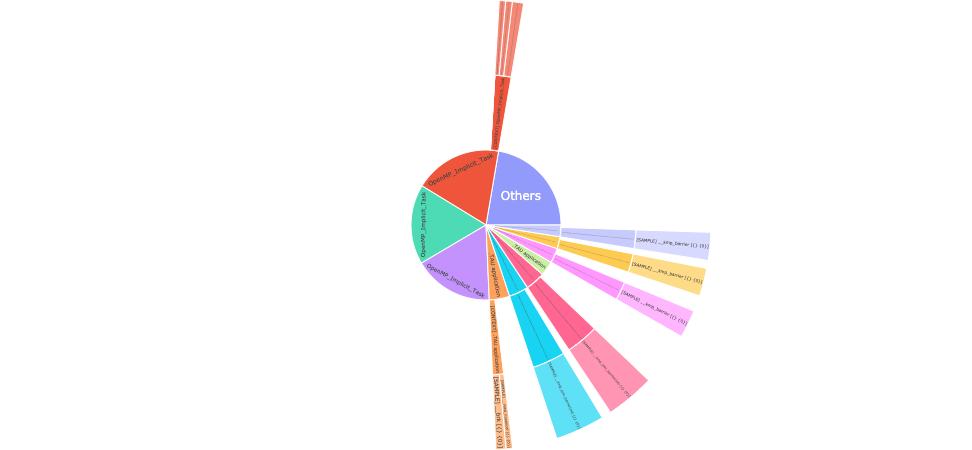

In [85]:
import plotly.graph_objects as go

fig =go.Figure(go.Sunburst(
    ids=ids,
    labels=labels,
    parents=parents,
    values=values,
))
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()